# What's the Weather Like?

## Observable Trends

- Based on the sample analyzed (572 cities), temperature seems to get higher as we approach the equator (latitude 0). However, temperature seems to be the highest on cities with latitudes 20 to 40.
- Humidity seeems to be higher on cities located on the equator or very close to the equator (latitudes -20 to 20)
- There doesn't seem to be a strong correlation between cloudiness and latitude
- There seems to be a slight increase in wind speed as we move into higher latitudes


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import WeatherKey

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

## Perform API Calls

In [3]:
# URL Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + WeatherKey

In [4]:
# Create lists to append API data into
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start call counter
record = 1

# Print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the citiy list 
for city in cities:  
    
# Append calls for cities found an create print stament to skip cities not found
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
# Increase counter by one 
        record= record + 1
        
# Create delay to not exceed API calls limit
        time.sleep(1.01)
        
# If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Pyaozerskiy
Processing Record 2 | Buin
City not found. Skipping...
City not found. Skipping...
Processing Record 3 | Hobart
Processing Record 4 | Yellowknife
Processing Record 5 | Qaanaaq
Processing Record 6 | Albany
Processing Record 7 | Vaini
Processing Record 8 | Charters Towers
Processing Record 9 | Erzin
Processing Record 10 | Dalvik
Processing Record 11 | Santa Lucia
Processing Record 12 | Cabo San Lucas
Processing Record 13 | Dikson
Processing Record 14 | Punta Arenas
Processing Record 15 | Praia da Vitoria
Processing Record 16 | Tarko-Sale
Processing Record 17 | Wittelsheim
Processing Record 18 | Saint Anthony
Processing Record 19 | Busselton
Processing Record 20 | Nagorsk
Processing Record 21 | Rikitea
Processing Record 22 | Imbituba
Processing Record 23 | Mataura
City not found. Skipping...
Processing Record 24 | Guerrero Negro
Processing Record 25 | Kamaishi
Processing Record 26 | Hithadhoo
Proces

## Convert Raw Data to DataFrame

In [5]:
# Create dictonary with lists
dict_weather = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create data frame from dictionary
weather_data = pd.DataFrame(dict_weather)

# Count of weather data values
weather_data.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [10]:
# Save data frame to CSV
weather_data.to_csv('Downloads/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pyaozerskiy,100,RU,1562887822,77,65.83,31.17,42.89,18.16
1,Buin,29,CL,1562887823,71,-33.73,-70.74,53.60,5.82
2,Hobart,75,AU,1562887824,61,-42.88,147.33,48.20,19.46
3,Yellowknife,90,CA,1562887826,82,62.45,-114.38,59.00,4.70
4,Qaanaaq,0,GL,1562887827,48,77.48,-69.36,46.67,7.92


## Plotting the Data

## Latitude vs. Temperature Plot

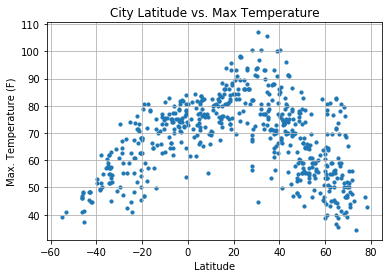

In [11]:
# Create scatter plot for lat and temp
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Create a title, x label, y label, and grid
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Downloads/Latitude_vs_Temp.png")

## Latitude vs. Humidity Plot

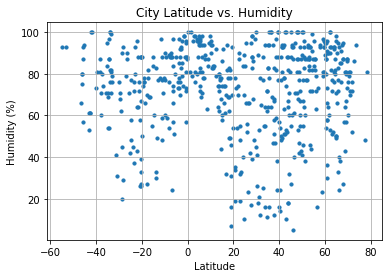

In [13]:
# Create scatter plot for lat and humidity 
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Create a title, x label, y label, and grid
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Downloads/Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

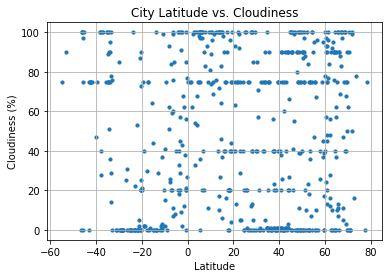

In [15]:
# Create a scatter plot for lat and cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Create a title, x label, y label, and grid
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Downloads/Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

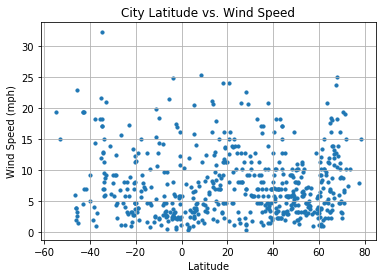

In [17]:
# Create a scatter plot for lat and wind speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Create a title, x label, y label, and grid
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Downloads/Latitude_vs_WindSpeed.png")